# Olist E-Commerce Business Analytics Project

This project analyzes 100K+ real Brazilian e-commerce orders to understand:
- Revenue trends
- Delivery performance
- Customer satisfaction
- Product category contribution
- Seller performance

Goal: Provide business insights to improve logistics, profitability, and customer experience.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
translation = pd.read_csv("product_category_name_translation.csv")

In [18]:
print("Orders:", orders.shape)
print("Items:", items.shape)
print("Payments:", payments.shape)
print("Reviews:", reviews.shape)

Orders: (99441, 8)
Items: (112650, 7)
Payments: (103886, 5)
Reviews: (99224, 7)


In [19]:
df = orders.merge(customers, on="customer_id")
df = df.merge(items, on="order_id")
df = df.merge(payments, on="order_id")
df = df.merge(reviews, on="order_id", how="left")
df = df.merge(products, on="product_id", how="left")
df = df.merge(sellers, on="seller_id", how="left")

df = df.merge(translation, on="product_category_name", how="left")

In [20]:
total_revenue = df["payment_value"].sum()
total_orders = df["order_id"].nunique()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)

Total Revenue: 20416842.54
Total Orders: 98665


In [21]:
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

df["delivery_delay"] = (
    df["order_delivered_customer_date"] -
    df["order_estimated_delivery_date"]
).dt.days

In [22]:
delay_rating = df.groupby("review_score")["delivery_delay"].mean()
print(delay_rating)

review_score
1.0    -6.003430
2.0    -9.748141
3.0   -11.114301
4.0   -12.468533
5.0   -13.443437
Name: delivery_delay, dtype: float64


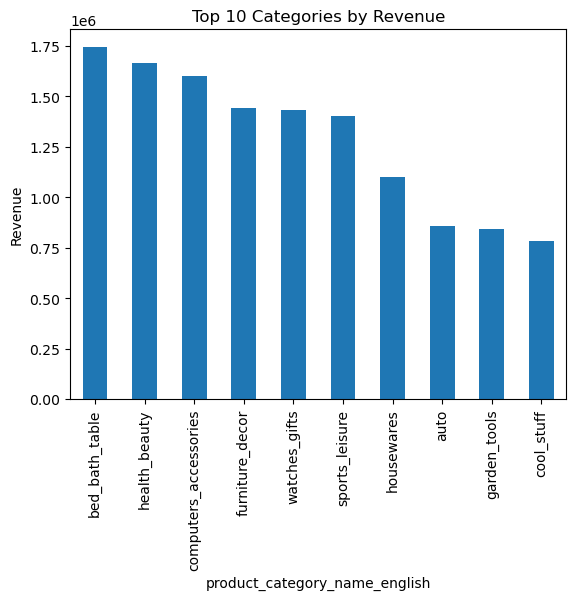

In [23]:
category_sales = df.groupby("product_category_name_english")["payment_value"].sum()

top10 = category_sales.sort_values(ascending=False).head(10)

top10.plot(kind="bar")
plt.title("Top 10 Categories by Revenue")
plt.ylabel("Revenue")
plt.show()

In [24]:
top_sellers = df.groupby("seller_id")["payment_value"].sum().sort_values(ascending=False)

print(top_sellers.head(10))

seller_id
7c67e1448b00f6e969d365cea6b010ab    512645.19
1025f0e2d44d7041d6cf58b6550e0bfa    312456.49
4a3ca9315b744ce9f8e9374361493884    306138.80
1f50f920176fa81dab994f9023523100    291918.98
53243585a1d6dc2643021fd1853d8905    284903.08
da8622b14eb17ae2831f4ac5b9dab84a    276578.63
4869f7a5dfa277a7dca6462dcf3b52b2    264166.12
955fee9216a65b617aa5c0531780ce60    236414.48
fa1c13f2614d7b5c4749cbc52fecda94    206513.23
7e93a43ef30c4f03f38b393420bc753a    185134.21
Name: payment_value, dtype: float64


## Final Conclusion

This analysis of 100K+ e-commerce orders revealed that:

- Late deliveries strongly reduce customer review scores.
- Revenue is concentrated in a few key product categories.
- A small group of sellers contribute a large portion of total revenue.

Business Recommendation:
Improve delivery performance, focus on high-revenue categories, and support top sellers to enhance profitability and customer satisfaction.